<a href="https://colab.research.google.com/github/KazGet/Laboratory-work/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000 изображений в обучающей выборке и 10000 - в тестовой. Каждое изображение: 28х28 пикселей в градациях серого (0 - черный цвет, 255 - белый цвет)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


x_train - изображения цифр
y_train - вектор значений цифр
x_test - тестовое изображение
y_test - значения тестового изображения

In [ ]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10) #представления цифр в виде вектора (длиной 10 элементов)
y_test_cat = keras.utils.to_categorical(y_test, 10) #единица будет стоять на месте предполагаемого числа - на отслаьных позициях - нули

Формирование модели НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #входной слой
    Dense(128, activation='relu'), #скрытый слой
    Dense(10, activation='softmax')  #выходной слой
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#Запуск процесса обучения: 80% обучающей выборки, 20% - выборка валидации
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2) #batch_size - количество изображения до нормирования весов

model.evaluate(x_test, y_test_cat)#подаем на вход тестовую выборку для подсчета критерия качества


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.9193 - val_loss: 0.1626 - val_accuracy: 0.9542
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1265 - accuracy: 0.9632 - val_loss: 0.1115 - val_accuracy: 0.9682
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9739 - val_loss: 0.1040 - val_accuracy: 0.9678
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 5/5
1/1 [==============================] - 0s 52ms/step
[[1.9026951e-09 1.6311051e-07 5.8349456e-06 9.9980515e-01 6.3243816e-10
  2.3510974e-07 5.7258229e-13 1.2641987e-06 1.8246088e-04 4.8424081e-06]]
3


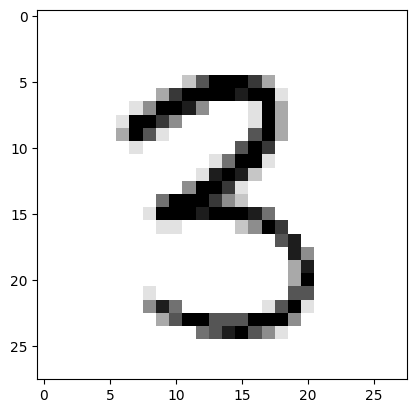

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:

n = 687 #берем i-ое изображение
x = np.expand_dims(x_test[n], axis=0) #трехмерный тензор (добавляем еще одну ось)
res = model.predict(x)
print( res )
print( np.argmax(res) ) #возврат индекса максимального значения

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()



Вывод элементов, не распознанных НС.

[ True  True  True  True  True  True  True  True  True  True]
(260, 28, 28)


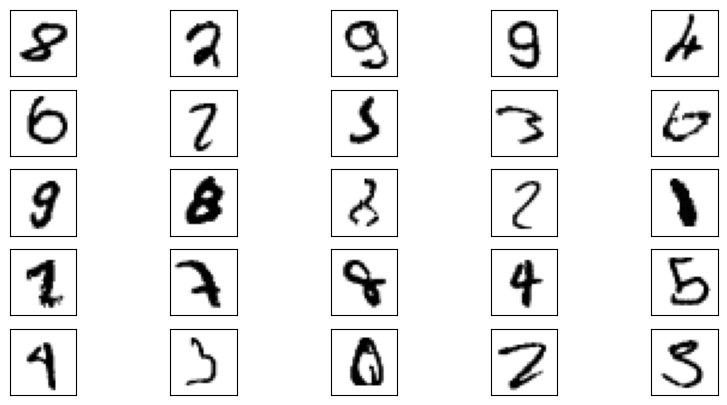

In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()